In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

In [2]:
application = pd.read_csv("data/application_data.csv")
previous_application = pd.read_csv("data/previous_application.csv")
column_desc = pd.read_csv("data/columns_description.csv").set_index("Unnamed: 0")

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)
pd.set_option("display.max_colwidth",None)
pd.options.display.float_format = '{:,.3f}'.format

In [4]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

In [5]:
sns.set_style("darkgrid")

In [6]:
cat = application.select_dtypes(include='object').columns
num = application.select_dtypes(exclude='object').columns
object_features = []
for cols in num:
    if(len(application[cols].value_counts())<20):
        object_features.append(cols)
application[object_features] = application[object_features].astype('object')
num = num.drop(object_features)
cat = application.select_dtypes(include='object').columns
print(num,'\n',cat)

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXP

In [7]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,"202,500.000","406,597.500","24,700.500","351,000.000",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,"-3,648.000",-2120,nan,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,"-1,134.000",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,"270,000.000","1,293,502.500","35,698.500","1,129,500.000",Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,"-1,186.000",-291,nan,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,nan,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.000","135,000.000","6,750.000","135,000.000",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,"-4,260.000",-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.556,0.730,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na

In [7]:
merged_applications = pd.merge(application,previous_application,on='SK_ID_CURR')
merged_applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,"202,500.000","406,597.500","24,700.500","351,000.000",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,"-3,648.000",-2120,nan,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,"-1,134.000",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000,1038818,Consumer loans,"9,251.775","179,055.000","179,055.000",0.000,"179,055.000",SATURDAY,9,Y,1,0.000,nan,nan,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.000,low_normal,POS other with interest,"365,243.000",-565.000,125.000,-25.000,-17.000,0.000
1,100003,0,Cash loans,F,N,N,0,"270,000.000","1,293,502.500","35,698.500","1,129,500.0

In [67]:
# list_merged = merged_applications.groupby(['SK_ID_CURR'])
# common_columns = ["SK_ID_PREV","NAME_CONTRACT_TYPE_y","AMT_CREDIT_y","AMT_ANNUITY_y","AMT_GOODS_PRICE_y","NAME_TYPE_SUITE_y"
#                   ,"WEEKDAY_APPR_PROCESS_START_y","HOUR_APPR_PROCESS_START_y"]
# list_merged_df = application.copy()
# list_merged_df.set_index('SK_ID_CURR',inplace=True)
# for col in common_columns:
#     list_merged_df[col+"_list"] = list_merged[col].apply(list)


In [8]:
list_merged = merged_applications.groupby(['SK_ID_CURR'])
common_columns = merged_applications.iloc[:,122:]
list_merged_df = application.copy()
list_merged_df.set_index('SK_ID_CURR',inplace=True)
for col in common_columns:
    list_merged_df[col+"_list"] = list_merged[col].apply(list)
list_merged_df.reset_index(inplace=True)

In [13]:
application.columns & previous_application.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START'],
      dtype='object')

In [9]:
list_merged_df.shape,merged_applications.shape

((307511, 158), (1413701, 158))

In [15]:
[col for col in previous_application if col not in application]

['SK_ID_PREV',
 'AMT_APPLICATION',
 'AMT_DOWN_PAYMENT',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [154]:
list_merged_df.iloc[:,122:].head()

,SK_ID_PREV_list,NAME_CONTRACT_TYPE_y_list,AMT_ANNUITY_y_list,AMT_APPLICATION_list,AMT_CREDIT_y_list,AMT_DOWN_PAYMENT_list,AMT_GOODS_PRICE_y_list,WEEKDAY_APPR_PROCESS_START_y_list,HOUR_APPR_PROCESS_START_y_list,FLAG_LAST_APPL_PER_CONTRACT_list,NFLAG_LAST_APPL_IN_DAY_list,RATE_DOWN_PAYMENT_list,RATE_INTEREST_PRIMARY_list,RATE_INTEREST_PRIVILEGED_list,NAME_CASH_LOAN_PURPOSE_list,NAME_CONTRACT_STATUS_list,DAYS_DECISION_list,NAME_PAYMENT_TYPE_list,CODE_REJECT_REASON_list,NAME_TYPE_SUITE_y_list,NAME_CLIENT_TYPE_list,NAME_GOODS_CATEGORY_list,NAME_PORTFOLIO_list,NAME_PRODUCT_TYPE_list,CHANNEL_TYPE_list,SELLERPLACE_AREA_list,NAME_SELLER_INDUSTRY_list,CNT_PAYMENT_list,NAME_YIELD_GROUP_list,PRODUCT_COMBINATION_list,DAYS_FIRST_DRAWING_list,DAYS_FIRST_DUE_list,DAYS_LAST_DUE_1ST_VERSION_list,DAYS_LAST_DUE_list,DAYS_TERMINATION_list,NFLAG_INSURED_ON_APPROVAL_list,No_of_PreviousApplications,Previous_bins,Credit_to_Income,Credit_bins,Annuity_to_Income,Annuity_bins,Goods_to_Income,Goods_bins
0,[1038818],[Consumer loans],[9251.775],[179055.0],[179055.0],[0.0],[179055.0],[SATURDAY],[9],[Y],[1],[0.0],[nan],[nan],[XAP],[Approved],[-606],[XNA],[XAP],[nan],[New],[Vehicles],[POS],[XNA],[Stone],[500],[Auto technology],[24.0],[low_normal],[POS other with interest],[365243.0],[-565.0],[125.0],[-25.0],[-17.0],[0.0],1.000,"(0, 5]",200.789,"(200.0, 300.0]",12.198,"(10.0, 20.0]",173.333,"(166.667, 200.0]"
1,"[1810518, 2636178, 2396755]","[Cash loans, Consumer loans, Consumer loans]","[98356.995, 64567.665, 6737.31]","[900000.0, 337500.0, 68809.5]","[1035882.0, 348637.5, 68053.5]","[nan, 0.0, 6885.0]","[900000.0, 337500.0, 68809.5]","[FRIDAY, SUNDAY, SATURDAY]","[12, 17, 15]","[Y, Y, Y]","[1, 1, 1]","[nan, 0.0, 0.10006059514256237]","[nan, nan, nan]","[nan, nan, nan]","[XNA, XAP, XAP]","[Approved, Approved, Approved]","[-746, -828, -2341]","[XNA, Cash through the bank, Cash through the bank]","[XAP, XAP, XAP]","[Unaccompanied, Family, Family]","[Repeater, Refreshed, Refreshed]","[XNA, Furniture, Consumer Electronics]","[Cash, POS, POS]","[x-sell, XNA, XNA]","[Credit and cash offices, Stone, Country-wide]","[-1, 1400, 200]","[XNA, Furniture, Consumer electronics]","[12.0, 6.0, 12.0]","[low_normal, middle, middle]","[Cash X-Sell: low, POS industry with interest, POS household with interest]","[365243.0, 365243.0, 365243.0]","[-716.0, -797.0, -2310.0]","[-386.0, -647.0, -1980.0]","[-536.0, -647.0, -1980.0]","[-527.0, -639.0, -1976.0]","[1.0, 0.0, 1.0]",3.000,"(0, 5]",479.075,"(400.0, 500.0]",13.222,"(10.0, 20.0]",418.333,"(416.667, 504.0]"
2,[1564014],[Consumer loans],[5357.25],[24282.0],[20106.0],[4860.0],[24282.0],[FRIDAY],[5],[Y],[1],[0.21200760306744432],[nan],[nan],[XAP],[Approved],[-815],[Cash through the bank],[XAP],[Unaccompanied],[New],[Mobile],[POS],[XNA],[Regional / Local],[30],[Connectivity],[4.0],[middle],[POS mobile without interest],[365243.0],[-784.0],[-694.0],[-724.0],[-714.0],[0.0],1.000,"(0, 5]",200.000,"(100.0, 200.0]",10.000,"(0.0, 10.0]",200.000,"(166.667, 200.0]"
3,"[2078043, 2827850, 2190416, 1489396, 1020698, 1243599, 2299329, 2545789, 1697039]","[Cash loans, Revolving loans, Consumer loans, Revolving loans, Cash loans, Cash loans, Consumer loans, Cash loans, Cash loans]","[24246.0, nan, 29027.52, 13500.0, 39954.51, nan, 2482.92, nan, 32696.1]","[675000.0, 0.0, 334917.0, 270000.0, 454500.0, 0.0, 26912.34, 0.0, 688500.0]","[675000.0, 0.0, 267930.0, 270000.0, 481495.5, 0.0, 24219.0, 0.0, 906615.0]","[nan, nan, 66987.0, nan, nan, nan, 2693.34, nan, nan]","[675000.0, nan, 334917.0, 270000.0, 454500.0, nan, 26912.34, nan, 688500.0]","[THURSDAY, THURSDAY, SUNDAY, THURSDAY, SATURDAY, THURSDAY, TUESDAY, THURSDAY, THURSDAY]","[15, 15, 15, 15, 12, 15, 15, 15, 15]","[Y, Y, Y, Y, Y, Y, Y, Y, Y]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[nan, nan, 0.2178298883821148, nan, nan, nan, 0.10899431669973364, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan]","[XNA, XAP, XAP, XAP, XNA, XNA, XAP, XNA, XNA]","[Ap

## No of Previous Columns

In [41]:
list_merged_df['No_of_PreviousApplications'] = list_merged_df['SK_ID_PREV_list'].str.len()

In [16]:
((list_merged_df.iloc[:,122:].isna().sum())/len(list_merged_df)*100).sort_values(ascending=False).head(100)

No_of_PreviousApplications          5.351
NAME_PAYMENT_TYPE_list              5.351
NAME_CONTRACT_STATUS_list           5.351
NAME_CASH_LOAN_PURPOSE_list         5.351
RATE_INTEREST_PRIVILEGED_list       5.351
RATE_INTEREST_PRIMARY_list          5.351
RATE_DOWN_PAYMENT_list              5.351
NFLAG_LAST_APPL_IN_DAY_list         5.351
FLAG_LAST_APPL_PER_CONTRACT_list    5.351
HOUR_APPR_PROCESS_START_y_list      5.351
WEEKDAY_APPR_PROCESS_START_y_list   5.351
AMT_GOODS_PRICE_y_list              5.351
AMT_DOWN_PAYMENT_list               5.351
AMT_CREDIT_y_list                   5.351
AMT_APPLICATION_list                5.351
AMT_ANNUITY_y_list                  5.351
NAME_CONTRACT_TYPE_y_list           5.351
DAYS_DECISION_list                  5.351
CODE_REJECT_REASON_list             5.351
NFLAG_INSURED_ON_APPROVAL_list      5.351
NAME_TYPE_SUITE_y_list              5.351
DAYS_TERMINATION_list               5.351
DAYS_LAST_DUE_list                  5.351
DAYS_LAST_DUE_1ST_VERSION_list    

In [157]:
previous_bins = [0,5,10,15,20,60]
list_merged_df['Previous_bins'] = pd.cut(list_merged_df['No_of_PreviousApplications'],bins=previous_bins)
list_merged_df['Previous_bins'].value_counts()

(0, 5]      197906
(5, 10]      67646
(10, 15]     18025
(15, 20]      4979
(20, 60]      2490
Name: Previous_bins, dtype: int64

In [158]:
a = list_merged_df.groupby(['Previous_bins','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['DEFAULTER_RATES'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1).rename(columns={'SK_ID_CURR':'TOTALCOUNT'}).reset_index()
a['TOTALCOUNT'] = (a_level1/len(list_merged_df)*100).reset_index()['SK_ID_CURR']
a

,Previous_bins,TOTALCOUNT,DEFAULTER_RATES
0,"(0, 5]",64.357,7.940
1,"(5, 10]",21.998,8.277
2,"(10, 15]",5.862,9.426
3,"(15, 20]",1.619,10.705
4,"(20, 60]",0.810,12.088


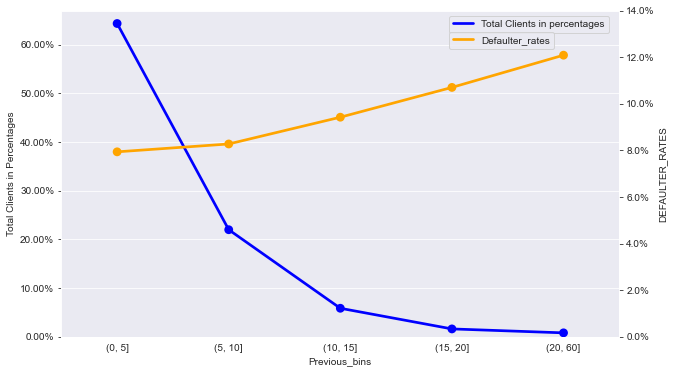

In [97]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(10,6))


sns.pointplot(x='Previous_bins',y='TOTALCOUNT',data=a,ax=ax1,color='blue',legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax1.set(ylabel='Total Clients in Percentages',ylim=(0,67))
ax2 = ax1.twinx()


sns.pointplot(x='Previous_bins',y='DEFAULTER_RATES',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.892,0.95))
ax1.legend(labels=['Total Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.set(ylim=(0,14))
ax2.grid(None)

plt.show()

## Credit to Income

In [164]:
list_merged_df['Credit_to_Income'] = list_merged_df['AMT_CREDIT']/list_merged_df['AMT_INCOME_TOTAL']*100
list_merged_df['Credit_to_Income'].describe()

count   307,511.000
mean        395.757
std         268.973
min           0.481
25%         201.867
50%         326.507
75%         515.988
max       8,473.684
Name: Credit_to_Income, dtype: float64

In [165]:
credit_bins = [0,100,200,300,400,500,600,700,800,900,8473.684]
list_merged_df['Credit_bins'] = pd.cut(list_merged_df['Credit_to_Income'],bins=credit_bins)
list_merged_df['Credit_bins'].value_counts()

(200.0, 300.0]       64858
(100.0, 200.0]       60164
(300.0, 400.0]       48703
(400.0, 500.0]       36805
(500.0, 600.0]       26082
(600.0, 700.0]       17703
(0.0, 100.0]         16174
(900.0, 8473.684]    16115
(700.0, 800.0]       12873
(800.0, 900.0]        8033
Name: Credit_bins, dtype: int64

In [166]:
a = list_merged_df.groupby(['Credit_bins','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['DEFAULTER_RATES'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1).rename(columns={'SK_ID_CURR':'TOTALCOUNT'}).reset_index()
a['TOTALCOUNT'] = (a_level1/len(list_merged_df)*100).reset_index()['SK_ID_CURR']
a

,Credit_bins,TOTALCOUNT,DEFAULTER_RATES
0,"(0.0, 100.0]",5.260,6.436
1,"(100.0, 200.0]",19.565,7.696
2,"(200.0, 300.0]",21.091,8.690
3,"(300.0, 400.0]",15.838,9.110
4,"(400.0, 500.0]",11.969,8.472
5,"(500.0, 600.0]",8.482,7.653
6,"(600.0, 700.0]",5.757,7.535
7,"(700.0, 800.0]",4.186,7.116
8,"(800.0, 900.0]",2.612,7.731
9,"(900.0, 8473.684]",5.240,6.795


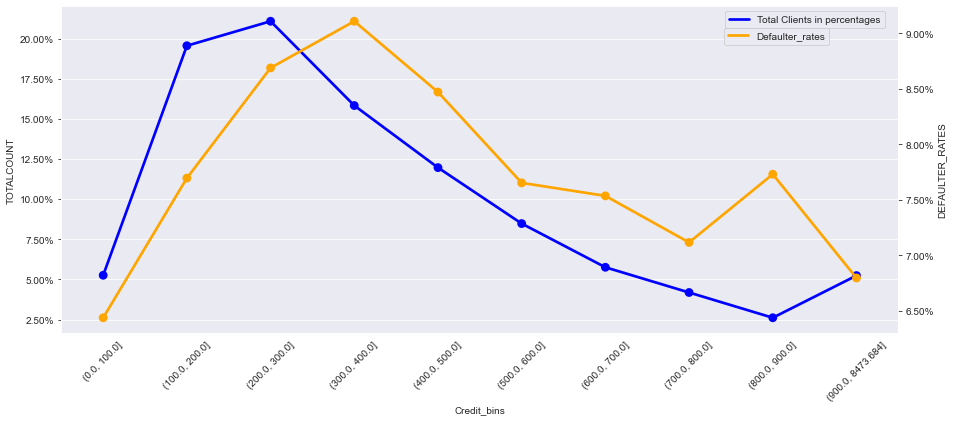

In [128]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(15,6))


sns.pointplot(x='Credit_bins',y='TOTALCOUNT',data=a,ax=ax1,color='blue',legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
# ax1.set(ylabel='Total Clients in Percentages',ylim=(8,11))
ax2 = ax1.twinx()


sns.pointplot(x='Credit_bins',y='DEFAULTER_RATES',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.9235,0.95))
ax1.legend(labels=['Total Clients in percentages'],bbox_to_anchor=(0.99,1))
# ax2.set(ylim=(5,11c))
ax1.set_xticklabels(a['Credit_bins'],rotation=45)
ax2.grid(None)

plt.show()

In [112]:
list_merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV_list,NAME_CONTRACT_TYPE_y_list,AMT_ANNUITY_y_list,AMT_APPLICATION_list,AMT_CREDIT_y_list,AMT_DOWN_PAYMENT_list,AMT_GOODS_PRICE_y_list,WEEKDAY_APPR_PROCESS_START_y_list,HOUR_APPR_PROCESS_START_y_list,FLAG_LAST_APPL_PER_CONTRACT_list,NFLAG_LAST_APPL_IN_DAY_list,RATE_DOWN_PAYMENT_list,RATE_INTEREST_PRIMARY_list,RATE_INTEREST_PRIVILEGED_list,NAME_CASH_LOAN_PURPOSE_list,NAME_CONTRACT_STATUS_list,DAYS_DECISION_list,NAME_PAYMENT_TYPE_list,CODE_REJECT_REASON_list,NAME_TYPE_SUITE_y_list,NAME_CLIENT_TYPE_list,NAME_GOODS_CATEGORY_list,NAME_PORTFOLIO_list,NAME_PRODUCT_TYPE_list,CHANNEL_TYPE_list,SELLERPLACE_AREA_list,NAME_SELLER_INDUSTRY_list,CNT_PAYMENT_list,NAME_YIELD_GROUP_list,PRODUCT_COMBINATION_list,DAYS_FIRST_DRAWING_list,DAYS_FIRST_DUE_list,DAYS_LAST_DUE_1ST_VERSION_list,DAYS_LAST_DUE_list,DAYS_TERMINATION_list,NFLAG_INSURED_ON_APPROVAL_list,No_of_PreviousApplications,Previous_bins,Credit_to_Income,Credit_bins
0,100002,1,Cash loans,M,N,Y,0,"202,500.000","406,597.500","24,700.500","351,000.000",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,"-3,648.000",-2120,nan,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,"-1,134.000",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000,[1038818],[Consumer loans],[9251.775],[179055.0],[179055.0],[0.0],[179055.0],[SATURDAY],[9],[Y],[1],[0.0],[nan],[nan],[XAP],[Approved

## Annuity to Income

In [133]:
list_merged_df['Annuity_to_Income'] = list_merged_df['AMT_ANNUITY']/list_merged_df['AMT_INCOME_TOTAL']*100
list_merged_df['Annuity_to_Income'].describe()

count   307,499.000
mean         18.093
std           9.457
min           0.022
25%          11.478
50%          16.283
75%          22.907
max         187.596
Name: Annuity_to_Income, dtype: float64

In [135]:
annuity_bins = [0,10,20,30,40,50,60,70,80,187.596]
list_merged_df['Annuity_bins'] = pd.cut(list_merged_df['Annuity_to_Income'],bins=annuity_bins)
list_merged_df['Annuity_bins'].value_counts()

(10.0, 20.0]       145231
(20.0, 30.0]        73742
(0.0, 10.0]         57210
(30.0, 40.0]        23407
(40.0, 50.0]         5379
(50.0, 60.0]         1611
(60.0, 70.0]          523
(70.0, 80.0]          222
(80.0, 187.596]       173
Name: Annuity_bins, dtype: int64

In [136]:
a = list_merged_df.groupby(['Annuity_bins','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['DEFAULTER_RATES'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1).rename(columns={'SK_ID_CURR':'TOTALCOUNT'}).reset_index()
a['TOTALCOUNT'] = (a_level1/len(list_merged_df)*100).reset_index()['SK_ID_CURR']
a

,Annuity_bins,TOTALCOUNT,DEFAULTER_RATES
0,"(0.0, 10.0]",18.604,7.175
1,"(10.0, 20.0]",47.228,8.057
2,"(20.0, 30.0]",23.980,8.764
3,"(30.0, 40.0]",7.612,8.126
4,"(40.0, 50.0]",1.749,8.608
5,"(50.0, 60.0]",0.524,7.200
6,"(60.0, 70.0]",0.170,8.413
7,"(70.0, 80.0]",0.072,7.207
8,"(80.0, 187.596]",0.056,8.092


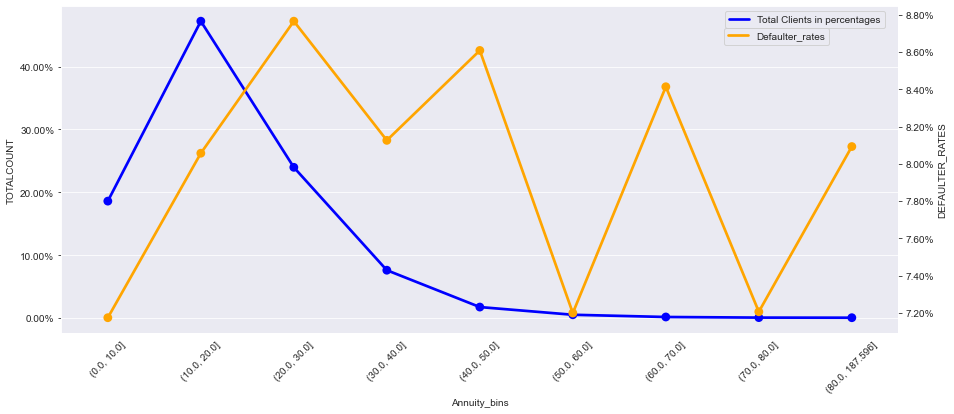

In [138]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(15,6))


sns.pointplot(x='Annuity_bins',y='TOTALCOUNT',data=a,ax=ax1,color='blue',legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
# ax1.set(ylabel='Total Clients in Percentages',ylim=(8,11))
ax2 = ax1.twinx()


sns.pointplot(x='Annuity_bins',y='DEFAULTER_RATES',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.9235,0.95))
ax1.legend(labels=['Total Clients in percentages'],bbox_to_anchor=(0.99,1))
# ax2.set(ylim=(5,11))
ax1.set_xticklabels(a['Annuity_bins'],rotation=45)
ax2.grid(None)

plt.show()

## Goods Price to Income

In [143]:
list_merged_df['Goods_to_Income'] = list_merged_df['AMT_GOODS_PRICE']/list_merged_df['AMT_INCOME_TOTAL']*100
list_merged_df['Goods_to_Income'].describe()

count   307,233.000
mean        354.432
std         242.771
min           0.388
25%         184.000
50%         294.118
75%         461.538
max       8,473.684
Name: Goods_to_Income, dtype: float64

In [151]:
# goods_bins = [0,120,1,180,240,300,360,420,480,540,8473.684]
# list_merged_df['Goods_bins'] = pd.cut(list_merged_df['Goods_to_Income'],bins=goods_bins)
list_merged_df['Goods_bins'] = pd.qcut(list_merged_df['Goods_to_Income'],q=10)
list_merged_df['Goods_bins'].value_counts()

(200.0, 250.0]         34465
(120.0, 166.667]       34262
(0.387, 120.0]         32069
(340.909, 416.667]     31881
(504.0, 666.667]       31440
(294.118, 340.909]     30099
(666.667, 8473.684]    29988
(416.667, 504.0]       29576
(166.667, 200.0]       27730
(250.0, 294.118]       25723
Name: Goods_bins, dtype: int64

In [152]:
a = list_merged_df.groupby(['Goods_bins','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['DEFAULTER_RATES'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1).rename(columns={'SK_ID_CURR':'TOTALCOUNT'}).reset_index()
a['TOTALCOUNT'] = (a_level1/len(list_merged_df)*100).reset_index()['SK_ID_CURR']
a

,Goods_bins,TOTALCOUNT,DEFAULTER_RATES
0,"(0.387, 120.0]",10.429,7.300
1,"(120.0, 166.667]",11.142,8.269
2,"(166.667, 200.0]",9.018,8.590
3,"(200.0, 250.0]",11.208,9.441
4,"(250.0, 294.118]",8.365,8.650
5,"(294.118, 340.909]",9.788,8.814
6,"(340.909, 416.667]",10.367,8.466
7,"(416.667, 504.0]",9.618,7.719
8,"(504.0, 666.667]",10.224,6.991
9,"(666.667, 8473.684]",9.752,6.456


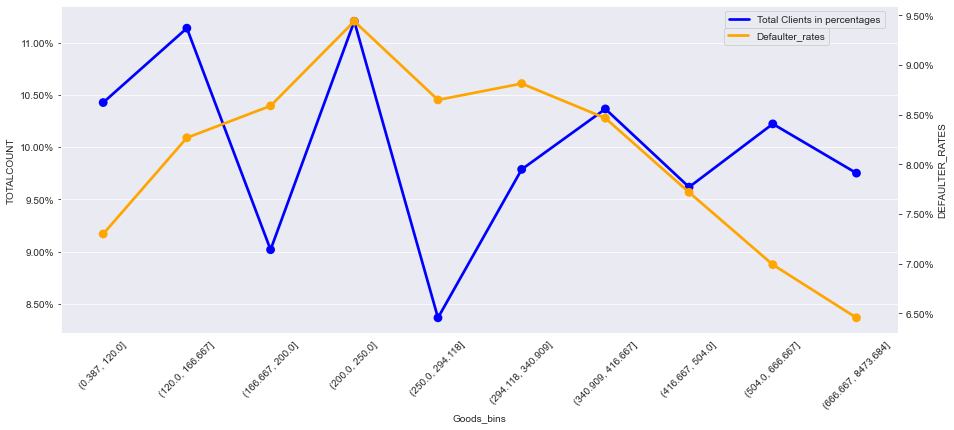

In [153]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(15,6))


sns.pointplot(x='Goods_bins',y='TOTALCOUNT',data=a,ax=ax1,color='blue',legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
# ax1.set(ylabel='Total Clients in Percentages',ylim=(8,11))
ax2 = ax1.twinx()


sns.pointplot(x='Goods_bins',y='DEFAULTER_RATES',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.9235,0.95))
ax1.legend(labels=['Total Clients in percentages'],bbox_to_anchor=(0.99,1))
# ax2.set(ylim=(5,11))
ax1.set_xticklabels(a['Goods_bins'],rotation=45)
ax2.grid(None)

plt.show()

## No of Documents submitted

In [175]:
list_merged_df['No_of_DocumentsSubmitted'] = list_merged_df.iloc[:,96:116].sum(axis=1)
list_merged_df['No_of_DocumentsSubmitted'].describe()

count   307,511.000
mean          0.930
std           0.344
min           0.000
25%           1.000
50%           1.000
75%           1.000
max           4.000
Name: No_of_DocumentsSubmitted, dtype: float64

In [176]:
a = list_merged_df.groupby(['No_of_DocumentsSubmitted','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['DEFAULTER_RATES'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1).rename(columns={'SK_ID_CURR':'TOTALCOUNT'}).reset_index()
a['TOTALCOUNT'] = (a_level1/len(list_merged_df)*100).reset_index()['SK_ID_CURR']
a

,No_of_DocumentsSubmitted,TOTALCOUNT,DEFAULTER_RATES
0,0.000,9.609,5.523
1,1.000,87.820,8.449
2,2.000,2.518,4.637
3,3.000,0.053,9.816
4,4.000,0.000,100.000


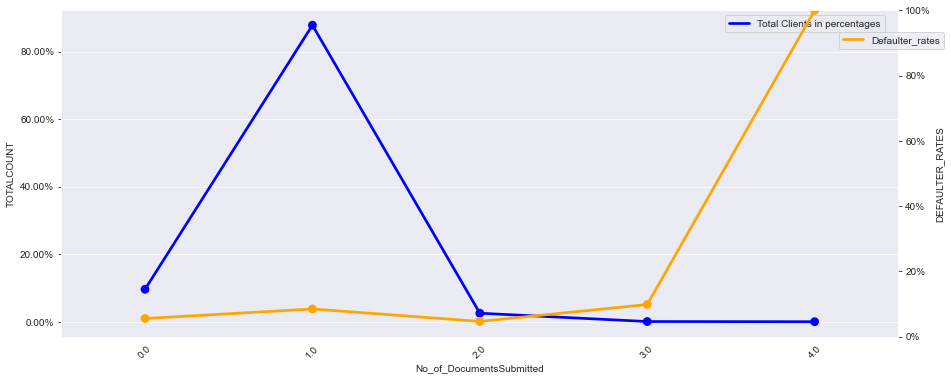

In [180]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(15,6))


sns.pointplot(x='No_of_DocumentsSubmitted',y='TOTALCOUNT',data=a,ax=ax1,color='blue',legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
# ax1.set(ylabel='Total Clients in Percentages',ylim=(8,11))
ax2 = ax1.twinx()


sns.pointplot(x='No_of_DocumentsSubmitted',y='DEFAULTER_RATES',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.9235,0.95))
ax1.legend(labels=['Total Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.set(ylim=(0,100))
ax1.set_xticklabels(a['No_of_DocumentsSubmitted'],rotation=45)
ax2.grid(None)

plt.show()

## Merged Dataset

In [154]:
list_merged_df.iloc[:,122:].head()

,SK_ID_PREV_list,NAME_CONTRACT_TYPE_y_list,AMT_ANNUITY_y_list,AMT_APPLICATION_list,AMT_CREDIT_y_list,AMT_DOWN_PAYMENT_list,AMT_GOODS_PRICE_y_list,WEEKDAY_APPR_PROCESS_START_y_list,HOUR_APPR_PROCESS_START_y_list,FLAG_LAST_APPL_PER_CONTRACT_list,NFLAG_LAST_APPL_IN_DAY_list,RATE_DOWN_PAYMENT_list,RATE_INTEREST_PRIMARY_list,RATE_INTEREST_PRIVILEGED_list,NAME_CASH_LOAN_PURPOSE_list,NAME_CONTRACT_STATUS_list,DAYS_DECISION_list,NAME_PAYMENT_TYPE_list,CODE_REJECT_REASON_list,NAME_TYPE_SUITE_y_list,NAME_CLIENT_TYPE_list,NAME_GOODS_CATEGORY_list,NAME_PORTFOLIO_list,NAME_PRODUCT_TYPE_list,CHANNEL_TYPE_list,SELLERPLACE_AREA_list,NAME_SELLER_INDUSTRY_list,CNT_PAYMENT_list,NAME_YIELD_GROUP_list,PRODUCT_COMBINATION_list,DAYS_FIRST_DRAWING_list,DAYS_FIRST_DUE_list,DAYS_LAST_DUE_1ST_VERSION_list,DAYS_LAST_DUE_list,DAYS_TERMINATION_list,NFLAG_INSURED_ON_APPROVAL_list,No_of_PreviousApplications,Previous_bins,Credit_to_Income,Credit_bins,Annuity_to_Income,Annuity_bins,Goods_to_Income,Goods_bins
0,[1038818],[Consumer loans],[9251.775],[179055.0],[179055.0],[0.0],[179055.0],[SATURDAY],[9],[Y],[1],[0.0],[nan],[nan],[XAP],[Approved],[-606],[XNA],[XAP],[nan],[New],[Vehicles],[POS],[XNA],[Stone],[500],[Auto technology],[24.0],[low_normal],[POS other with interest],[365243.0],[-565.0],[125.0],[-25.0],[-17.0],[0.0],1.000,"(0, 5]",200.789,"(200.0, 300.0]",12.198,"(10.0, 20.0]",173.333,"(166.667, 200.0]"
1,"[1810518, 2636178, 2396755]","[Cash loans, Consumer loans, Consumer loans]","[98356.995, 64567.665, 6737.31]","[900000.0, 337500.0, 68809.5]","[1035882.0, 348637.5, 68053.5]","[nan, 0.0, 6885.0]","[900000.0, 337500.0, 68809.5]","[FRIDAY, SUNDAY, SATURDAY]","[12, 17, 15]","[Y, Y, Y]","[1, 1, 1]","[nan, 0.0, 0.10006059514256237]","[nan, nan, nan]","[nan, nan, nan]","[XNA, XAP, XAP]","[Approved, Approved, Approved]","[-746, -828, -2341]","[XNA, Cash through the bank, Cash through the bank]","[XAP, XAP, XAP]","[Unaccompanied, Family, Family]","[Repeater, Refreshed, Refreshed]","[XNA, Furniture, Consumer Electronics]","[Cash, POS, POS]","[x-sell, XNA, XNA]","[Credit and cash offices, Stone, Country-wide]","[-1, 1400, 200]","[XNA, Furniture, Consumer electronics]","[12.0, 6.0, 12.0]","[low_normal, middle, middle]","[Cash X-Sell: low, POS industry with interest, POS household with interest]","[365243.0, 365243.0, 365243.0]","[-716.0, -797.0, -2310.0]","[-386.0, -647.0, -1980.0]","[-536.0, -647.0, -1980.0]","[-527.0, -639.0, -1976.0]","[1.0, 0.0, 1.0]",3.000,"(0, 5]",479.075,"(400.0, 500.0]",13.222,"(10.0, 20.0]",418.333,"(416.667, 504.0]"
2,[1564014],[Consumer loans],[5357.25],[24282.0],[20106.0],[4860.0],[24282.0],[FRIDAY],[5],[Y],[1],[0.21200760306744432],[nan],[nan],[XAP],[Approved],[-815],[Cash through the bank],[XAP],[Unaccompanied],[New],[Mobile],[POS],[XNA],[Regional / Local],[30],[Connectivity],[4.0],[middle],[POS mobile without interest],[365243.0],[-784.0],[-694.0],[-724.0],[-714.0],[0.0],1.000,"(0, 5]",200.000,"(100.0, 200.0]",10.000,"(0.0, 10.0]",200.000,"(166.667, 200.0]"
3,"[2078043, 2827850, 2190416, 1489396, 1020698, 1243599, 2299329, 2545789, 1697039]","[Cash loans, Revolving loans, Consumer loans, Revolving loans, Cash loans, Cash loans, Consumer loans, Cash loans, Cash loans]","[24246.0, nan, 29027.52, 13500.0, 39954.51, nan, 2482.92, nan, 32696.1]","[675000.0, 0.0, 334917.0, 270000.0, 454500.0, 0.0, 26912.34, 0.0, 688500.0]","[675000.0, 0.0, 267930.0, 270000.0, 481495.5, 0.0, 24219.0, 0.0, 906615.0]","[nan, nan, 66987.0, nan, nan, nan, 2693.34, nan, nan]","[675000.0, nan, 334917.0, 270000.0, 454500.0, nan, 26912.34, nan, 688500.0]","[THURSDAY, THURSDAY, SUNDAY, THURSDAY, SATURDAY, THURSDAY, TUESDAY, THURSDAY, THURSDAY]","[15, 15, 15, 15, 12, 15, 15, 15, 15]","[Y, Y, Y, Y, Y, Y, Y, Y, Y]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[nan, nan, 0.2178298883821148, nan, nan, nan, 0.10899431669973364, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan]","[XNA, XAP, XAP, XAP, XNA, XNA, XAP, XNA, XNA]","[Ap

In [16]:
((list_merged_df.iloc[:,122:].isna().sum())/len(list_merged_df)*100).sort_values(ascending=False).head(100)

No_of_PreviousApplications          5.351
NAME_PAYMENT_TYPE_list              5.351
NAME_CONTRACT_STATUS_list           5.351
NAME_CASH_LOAN_PURPOSE_list         5.351
RATE_INTEREST_PRIVILEGED_list       5.351
RATE_INTEREST_PRIMARY_list          5.351
RATE_DOWN_PAYMENT_list              5.351
NFLAG_LAST_APPL_IN_DAY_list         5.351
FLAG_LAST_APPL_PER_CONTRACT_list    5.351
HOUR_APPR_PROCESS_START_y_list      5.351
WEEKDAY_APPR_PROCESS_START_y_list   5.351
AMT_GOODS_PRICE_y_list              5.351
AMT_DOWN_PAYMENT_list               5.351
AMT_CREDIT_y_list                   5.351
AMT_APPLICATION_list                5.351
AMT_ANNUITY_y_list                  5.351
NAME_CONTRACT_TYPE_y_list           5.351
DAYS_DECISION_list                  5.351
CODE_REJECT_REASON_list             5.351
NFLAG_INSURED_ON_APPROVAL_list      5.351
NAME_TYPE_SUITE_y_list              5.351
DAYS_TERMINATION_list               5.351
DAYS_LAST_DUE_list                  5.351
DAYS_LAST_DUE_1ST_VERSION_list    

## New Columns

### No of Previous Applications

In [163]:
list_merged_df['No_of_PreviousApplications'].describe()

count   291,057.000
mean          4.857
std           4.147
min           1.000
25%           2.000
50%           4.000
75%           6.000
max          73.000
Name: No_of_PreviousApplications, dtype: float64

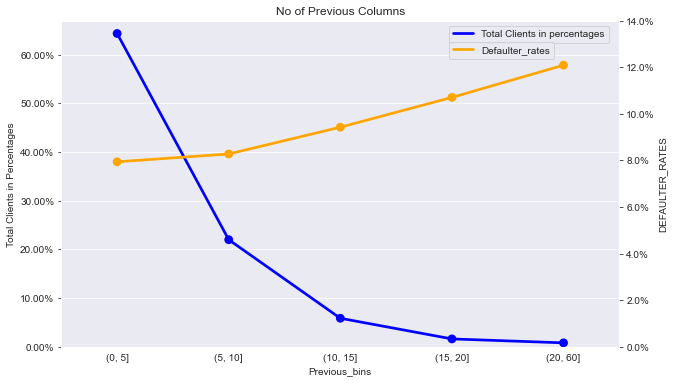

In [159]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(10,6))


sns.pointplot(x='Previous_bins',y='TOTALCOUNT',data=a,ax=ax1,color='blue',legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax1.set(ylabel='Total Clients in Percentages',ylim=(0,67),title='No of Previous Columns')
ax2 = ax1.twinx()


sns.pointplot(x='Previous_bins',y='DEFAULTER_RATES',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.892,0.95))
ax1.legend(labels=['Total Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.set(ylim=(0,14))
ax2.grid(None)

plt.show()

### Credit to Income

In [167]:
list_merged_df['Credit_to_Income'].describe()

count   307,511.000
mean        395.757
std         268.973
min           0.481
25%         201.867
50%         326.507
75%         515.988
max       8,473.684
Name: Credit_to_Income, dtype: float64

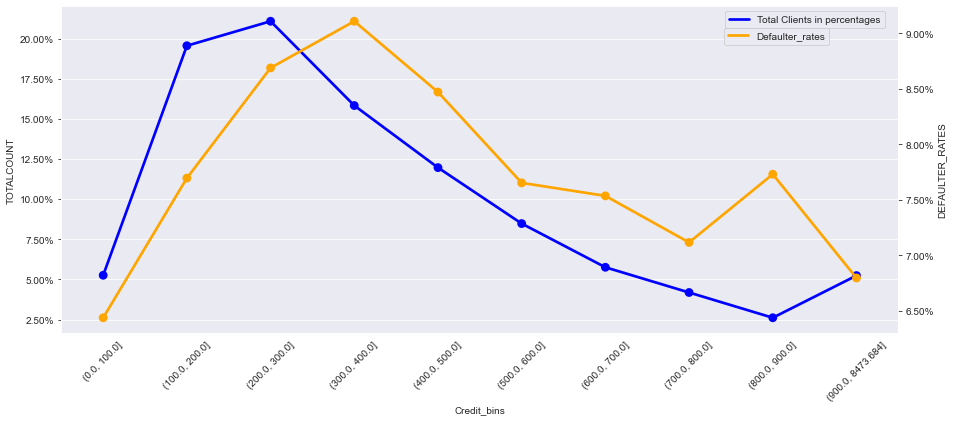

In [128]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(15,6))


sns.pointplot(x='Credit_bins',y='TOTALCOUNT',data=a,ax=ax1,color='blue',legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
# ax1.set(ylabel='Total Clients in Percentages',ylim=(8,11))
ax2 = ax1.twinx()


sns.pointplot(x='Credit_bins',y='DEFAULTER_RATES',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.9235,0.95))
ax1.legend(labels=['Total Clients in percentages'],bbox_to_anchor=(0.99,1))
# ax2.set(ylim=(5,11c))
ax1.set_xticklabels(a['Credit_bins'],rotation=45)
ax2.grid(None)

plt.show()

### Annuity to Income

In [168]:
list_merged_df['Annuity_to_Income'].describe()

count   307,499.000
mean         18.093
std           9.457
min           0.022
25%          11.478
50%          16.283
75%          22.907
max         187.596
Name: Annuity_to_Income, dtype: float64

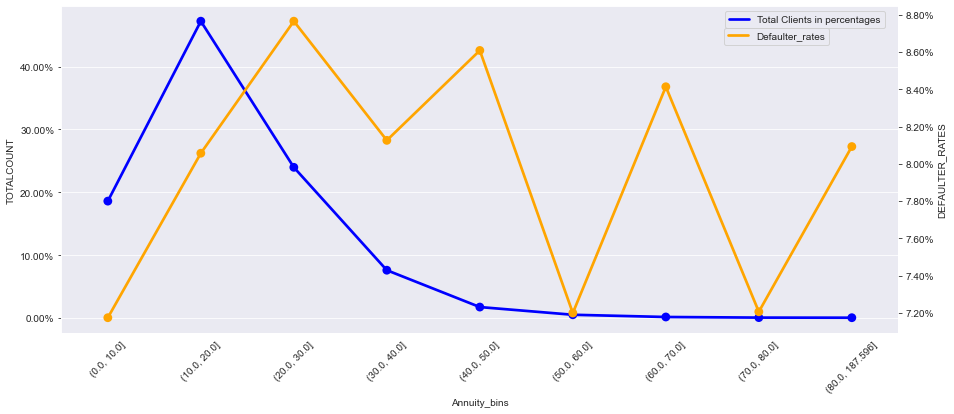

In [138]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(15,6))


sns.pointplot(x='Annuity_bins',y='TOTALCOUNT',data=a,ax=ax1,color='blue',legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
# ax1.set(ylabel='Total Clients in Percentages',ylim=(8,11))
ax2 = ax1.twinx()


sns.pointplot(x='Annuity_bins',y='DEFAULTER_RATES',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.9235,0.95))
ax1.legend(labels=['Total Clients in percentages'],bbox_to_anchor=(0.99,1))
# ax2.set(ylim=(5,11))
ax1.set_xticklabels(a['Annuity_bins'],rotation=45)
ax2.grid(None)

plt.show()

### Goods Price to Income

In [169]:
list_merged_df['Goods_to_Income'].describe()

count   307,233.000
mean        354.432
std         242.771
min           0.388
25%         184.000
50%         294.118
75%         461.538
max       8,473.684
Name: Goods_to_Income, dtype: float64

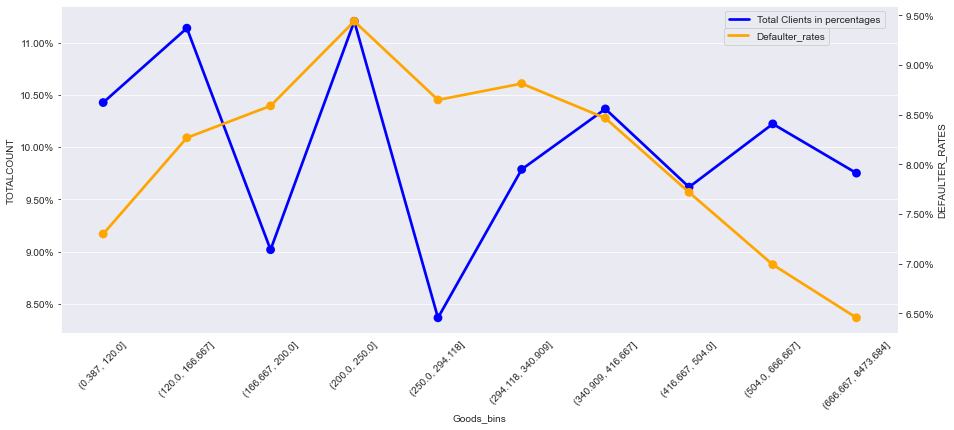

In [153]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(15,6))


sns.pointplot(x='Goods_bins',y='TOTALCOUNT',data=a,ax=ax1,color='blue',legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
# ax1.set(ylabel='Total Clients in Percentages',ylim=(8,11))
ax2 = ax1.twinx()


sns.pointplot(x='Goods_bins',y='DEFAULTER_RATES',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.9235,0.95))
ax1.legend(labels=['Total Clients in percentages'],bbox_to_anchor=(0.99,1))
# ax2.set(ylim=(5,11))
ax1.set_xticklabels(a['Goods_bins'],rotation=45)
ax2.grid(None)

plt.show()

## No of Documents submitted

In [181]:
list_merged_df['No_of_DocumentsSubmitted'].describe()

count   307,511.000
mean          0.930
std           0.344
min           0.000
25%           1.000
50%           1.000
75%           1.000
max           4.000
Name: No_of_DocumentsSubmitted, dtype: float64

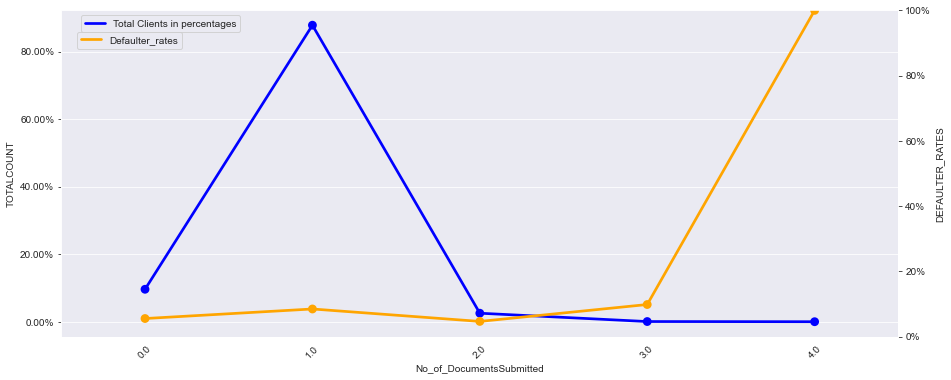

In [198]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(15,6))


sns.pointplot(x='No_of_DocumentsSubmitted',y='TOTALCOUNT',data=a,ax=ax1,color='blue',legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
# ax1.set(ylabel='Total Clients in Percentages',ylim=(8,11))
ax2 = ax1.twinx()


sns.pointplot(x='No_of_DocumentsSubmitted',y='DEFAULTER_RATES',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.15,0.95))
ax1.legend(labels=['Total Clients in percentages'],bbox_to_anchor=(0.22,1))
ax2.set(ylim=(0,100))
ax1.set_xticklabels(a['No_of_DocumentsSubmitted'],rotation=45)
ax2.grid(None)

plt.show()